In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import metrics
from sklearn import tree

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

#cross validation
# from sklearn.cross_validation import train_test_split IS NOW DEPRECATED
from sklearn.model_selection import train_test_split

In [2]:
#function imports a CSV file to DataFrame format
rawData = pd.read_csv('credit3.csv', header = 0)

#method is used to return top n (5 by default) rows of a data frame or series
rawData.head()

,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,bill_apr,bill_may,bill_jun,bill_jul,bill_avg,...,pmt_jul,pmt_avg,pmt_sep,pay_apr,pay_may,pay_jun,pay_jul,pay_avg,pay_sep,DEFAULT
0,0.0,3.0,1,24,20000,0,0,0,689,3102,...,0,689,0,-2,-2,-1,-1,2,2,1
1,0.0,3.0,2,26,120000,3261,3455,3272,2682,1725,...,1000,1000,0,2,0,0,0,2,-1,1
2,0.0,3.0,2,34,90000,15549,14948,14331,13559,14027,...,1000,1500,1518,0,0,0,0,0,0,0
3,0.0,3.0,1,37,50000,29547,28959,28314,49291,48233,...,1200,2019,2000,0,0,0,0,0,0,0
4,1.0,3.0,1,57,50000,19131,19146,20940,35835,5670,...,10000,36681,2000,0,0,0,-1,0,-1,0


In [3]:
# Examine the structure of the data
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEX        30000 non-null  float64
 1   EDUCATION  30000 non-null  float64
 2   MARRIAGE   30000 non-null  int64  
 3   AGE        30000 non-null  int64  
 4   LIMIT_BAL  30000 non-null  int64  
 5   bill_apr   30000 non-null  int64  
 6   bill_may   30000 non-null  int64  
 7   bill_jun   30000 non-null  int64  
 8   bill_jul   30000 non-null  int64  
 9   bill_avg   30000 non-null  int64  
 10  bill_sep   30000 non-null  int64  
 11  pmt_apr    30000 non-null  int64  
 12  pmt_may    30000 non-null  int64  
 13  pmt_jun    30000 non-null  int64  
 14  pmt_jul    30000 non-null  int64  
 15  pmt_avg    30000 non-null  int64  
 16  pmt_sep    30000 non-null  int64  
 17  pay_apr    30000 non-null  int64  
 18  pay_may    30000 non-null  int64  
 19  pay_jun    30000 non-null  int64  
 20  pay_ju

In [4]:
# View some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
rawData.describe()

,SEX,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,bill_apr,bill_may,bill_jun,bill_jul,bill_avg,...,pmt_jul,pmt_avg,pmt_sep,pay_apr,pay_may,pay_jun,pay_jul,pay_avg,pay_sep,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,...,30000.00000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.396267,1.598100,1.551867,35.485500,167484.322667,38871.760400,40311.400967,43262.948967,4.701315e+04,49179.075167,...,5225.68150,5.921163e+03,5663.580500,-0.291100,-0.266200,-0.220667,-0.166200,-0.133767,-0.016700,0.221200
std,0.489129,1.371656,0.521970,9.217904,129747.661567,59554.107537,60797.155770,64332.856134,6.934939e+04,71173.768783,...,17606.96147,2.304087e+04,16563.280354,1.149988,1.133187,1.169139,1.196868,1.197186,1.123802,0.415062
min,0.000000,0.000000,0.000000,21.000000,10000.000000,-339603.000000,-81334.000000,-170000.000000,-1.572640e+05,-69777.000000,...,0.00000,0.000000e+00,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,0.000000,0.000000,1.000000,28.000000,50000.000000,1256.000000,1763.000000,2326.750000,2.666250e+03,2984.750000,...,390.00000,8.330000e+02,1000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,1.000000,2.000000,34.000000,140000.000000,17071.000000,18104.500000,19052.000000,2.008850e+04,21200.000000,...,1800.00000,2.009000e+03,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,2.000000,41.000000,240000.000000,49198.250000,50190.500000,54506.000000,6.016475e+04,64006.250000,...,4505.00000,5.000000e+03,5006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,3.000000,79.000000,1000000.000000,961664.000000,927171.000000,891586.000000,1.664089e+06,983931.000000,...,896040.00000,1.684259e+06,873552.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


### Correlation

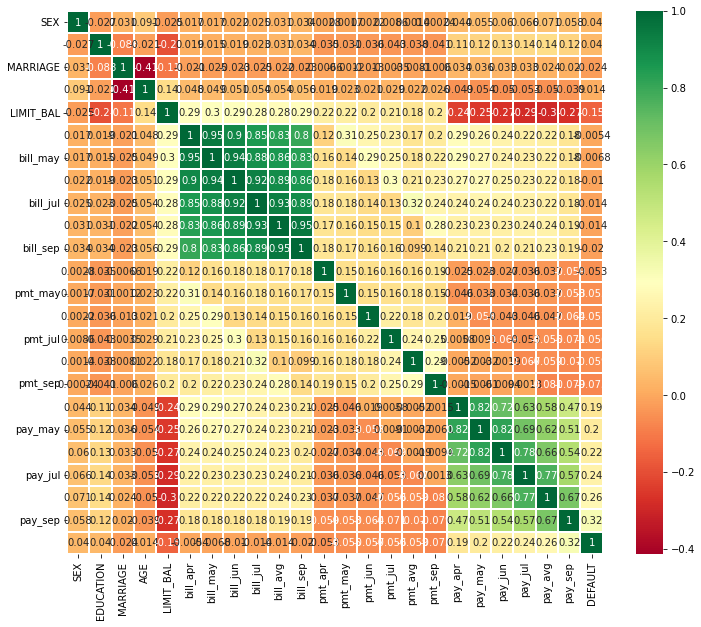

In [5]:
# Verify highly correlated variables, Corr-Coeff > 0.90
# credit_corr = CreditOneEDA.copy() 
# Correlation between features  ## All Features must be INT64 to Get Redundant Pairs ##  
sns.heatmap(rawData.corr(),annot=True,cmap='RdYlGn',linewidths=0.4) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

In [6]:
corr_mat = rawData.corr()
print(corr_mat)

                SEX  EDUCATION  MARRIAGE       AGE  LIMIT_BAL  bill_apr  \
SEX        1.000000  -0.027139  0.031389  0.090874  -0.024755  0.016733   
EDUCATION -0.027139   1.000000 -0.087956 -0.020678  -0.196273  0.019053   
MARRIAGE   0.031389  -0.087956  1.000000 -0.414170  -0.108139 -0.021207   
AGE        0.090874  -0.020678 -0.414170  1.000000   0.144713  0.047613   
LIMIT_BAL -0.024755  -0.196273 -0.108139  0.144713   1.000000  0.290389   
bill_apr   0.016733   0.019053 -0.021207  0.047613   0.290389  1.000000   
bill_may   0.017005   0.015064 -0.025393  0.049345   0.295562  0.946197   
bill_jun   0.021880   0.018970 -0.023344  0.051353   0.293988  0.900941   
bill_jul   0.024563   0.023399 -0.024909  0.053710   0.283236  0.853320   
bill_avg   0.031183   0.030756 -0.021602  0.054283   0.278314  0.831594   
bill_sep   0.033642   0.033723 -0.023472  0.056239   0.285430  0.802650   
pmt_apr    0.002766  -0.035161 -0.006641  0.019478   0.219595  0.115494   
pmt_may    0.001667  -0.0

### Covariance

In [7]:
covMat = rawData.cov()
print(covMat)

                   SEX     EDUCATION     MARRIAGE            AGE  \
SEX           0.239247     -0.018208     0.008014       0.409726   
EDUCATION    -0.018208      1.881439    -0.062974      -0.261453   
MARRIAGE      0.008014     -0.062974     0.272452      -1.992764   
AGE           0.409726     -0.261453    -1.992764      84.969755   
LIMIT_BAL -1571.050630 -34930.604407 -7323.669658  173076.722569   
bill_apr    487.430160   1556.428952  -659.223347   26137.648547   
bill_may    505.694333   1256.256590  -805.840875   27654.067800   
bill_jun    688.489572   1673.950355  -783.881599   30453.108180   
bill_jul    833.207432   2225.753773  -901.679085   34334.251320   
bill_avg   1085.595467   3002.625797  -802.517866   35613.657962   
bill_sep   1211.694332   3406.142693  -902.154685   38172.933546   
pmt_apr      24.051885   -857.397465   -61.623271    3191.903901   
pmt_may      12.458809   -655.090046    -9.607709    3218.052172   
pmt_jun      17.080110   -764.687597  -103.51820

### Selecting Data

In [8]:
#features
X = rawData.iloc[:,2:]
print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,LIMIT_BAL,bill_apr,bill_may,bill_jun,bill_jul,bill_avg,bill_sep,pmt_apr,...,pmt_jul,pmt_avg,pmt_sep,pay_apr,pay_may,pay_jun,pay_jul,pay_avg,pay_sep,DEFAULT
0,1,24,20000,0,0,0,689,3102,3913,0,...,0,689,0,-2,-2,-1,-1,2,2,1
1,2,26,120000,3261,3455,3272,2682,1725,2682,2000,...,1000,1000,0,2,0,0,0,2,-1,1
2,2,34,90000,15549,14948,14331,13559,14027,29239,5000,...,1000,1500,1518,0,0,0,0,0,0,0
3,1,37,50000,29547,28959,28314,49291,48233,46990,1000,...,1200,2019,2000,0,0,0,0,0,0,0
4,1,57,50000,19131,19146,20940,35835,5670,8617,679,...,10000,36681,2000,0,0,0,-1,0,-1,0


In [9]:
#dependent variable
y = rawData['LIMIT_BAL']
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


### Modeling Format

In [10]:
#prepare each regression algorithm
algosClass = []
algosClass.append(('Random Forest Regressor', RandomForestRegressor()))
algosClass.append(('Linear Regression', LinearRegression()))
algosClass.append(('Support Vector Regression', SVR()))

In [11]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [12]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.9998865222007907
Linear Regression 1.0
Support Vector Regression -0.01605220541091057


In [13]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 123)

In [14]:
#modeling
algo_rf = RandomForestRegressor()
model_rf = algo_rf.fit(X_train,y_train)

#Make Predictions
pred_rf = model_rf.predict(X_test)
pred_rf

array([ 40000.,  80000., 170000., ...,  10000.,  30000.,  30000.])

In [15]:
predRsq_rf = r2_score(y_test,pred_rf)
print('R Squared: %.3f' % predRsq_rf)

rmse_rf = sqrt(mean_squared_error(y_test, pred_rf))
print('RMSE: %.3f' % rmse_rf)

R Squared: 1.000
RMSE: 291.591


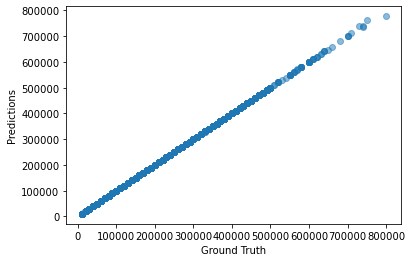

In [16]:
plt.scatter(y_test, pred_rf, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [17]:
#Modeling (Classification)
algo_dc = DecisionTreeClassifier()
model_dc = algo_dc.fit(X_train,y_train)

#Predictions 
pred_dc = model_dc.predict(X_test)
pred_dc #compare preds to y_test

array([ 40000,  80000, 170000, ...,  10000,  30000,  30000])

In [18]:
accuracy_score(pred_dc, y_test)

0.9991111111111111

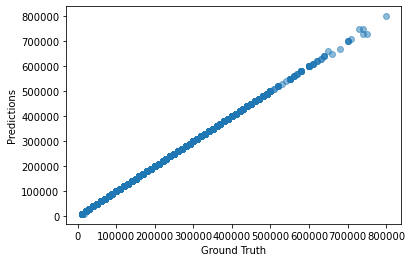

In [19]:
plt.scatter(y_test, pred_dc, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### Use Default

In [20]:
#features
X1 = rawData.iloc[:,1:24]
print('Summary of feature sample')
X1.head()

Summary of feature sample


,EDUCATION,MARRIAGE,AGE,LIMIT_BAL,bill_apr,bill_may,bill_jun,bill_jul,bill_avg,bill_sep,...,pmt_jul,pmt_avg,pmt_sep,pay_apr,pay_may,pay_jun,pay_jul,pay_avg,pay_sep,DEFAULT
0,3.0,1,24,20000,0,0,0,689,3102,3913,...,0,689,0,-2,-2,-1,-1,2,2,1
1,3.0,2,26,120000,3261,3455,3272,2682,1725,2682,...,1000,1000,0,2,0,0,0,2,-1,1
2,3.0,2,34,90000,15549,14948,14331,13559,14027,29239,...,1000,1500,1518,0,0,0,0,0,0,0
3,3.0,1,37,50000,29547,28959,28314,49291,48233,46990,...,1200,2019,2000,0,0,0,0,0,0,0
4,3.0,1,57,50000,19131,19146,20940,35835,5670,8617,...,10000,36681,2000,0,0,0,-1,0,-1,0


In [21]:
#dependent variable
y1 = rawData['DEFAULT']
print(y1)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64


In [22]:
#regression
results1 = []
names1 = []
for name1, model1 in algosClass:
    result1 = cross_val_score(model1, X1,y1, cv=3, scoring='r2')
    names1.append(name1)
    results1.append(result1)

In [23]:
for i in range(len(names1)):
    print(names1[i],results1[i].mean())

Random Forest Regressor 1.0
Linear Regression 1.0
Support Vector Regression -0.08521172868944633


In [24]:
#Train/Test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .3, random_state = 123)

In [25]:
#modeling
algo_rf1 = RandomForestRegressor()
model_rf1 = algo_rf1.fit(X1_train,y1_train)

#Make Predictions
pred_rf1 = model_rf1.predict(X1_test)
pred_rf1

array([0., 0., 1., ..., 0., 1., 0.])

In [26]:
predRsq_rf1 = r2_score(y1_test,pred_rf1)
print('R Squared: %.3f' % predRsq_rf1)

rmse_rf1 = sqrt(mean_squared_error(y1_test, pred_rf1))
print('RMSE: %.3f' % rmse_rf1)

R Squared: 1.000
RMSE: 0.000


In [27]:
#Modeling (Classification)
algo_dc1 = DecisionTreeClassifier(max_depth=3)
model_dc1 = algo_dc1.fit(X1_train,y1_train)

#Predictions 
pred_dc1 = model_dc1.predict(X1_test)
pred_dc1 #compare preds to y_test

array([0, 0, 1, ..., 0, 1, 0])

In [28]:
accuracy_score(pred_dc1, y1_test)

1.0

In [29]:
print(classification_report(y1_test, pred_dc1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7052
           1       1.00      1.00      1.00      1948

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [30]:
values = ['0:No','1:Yes'] #this is just a list specifying the region classes

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

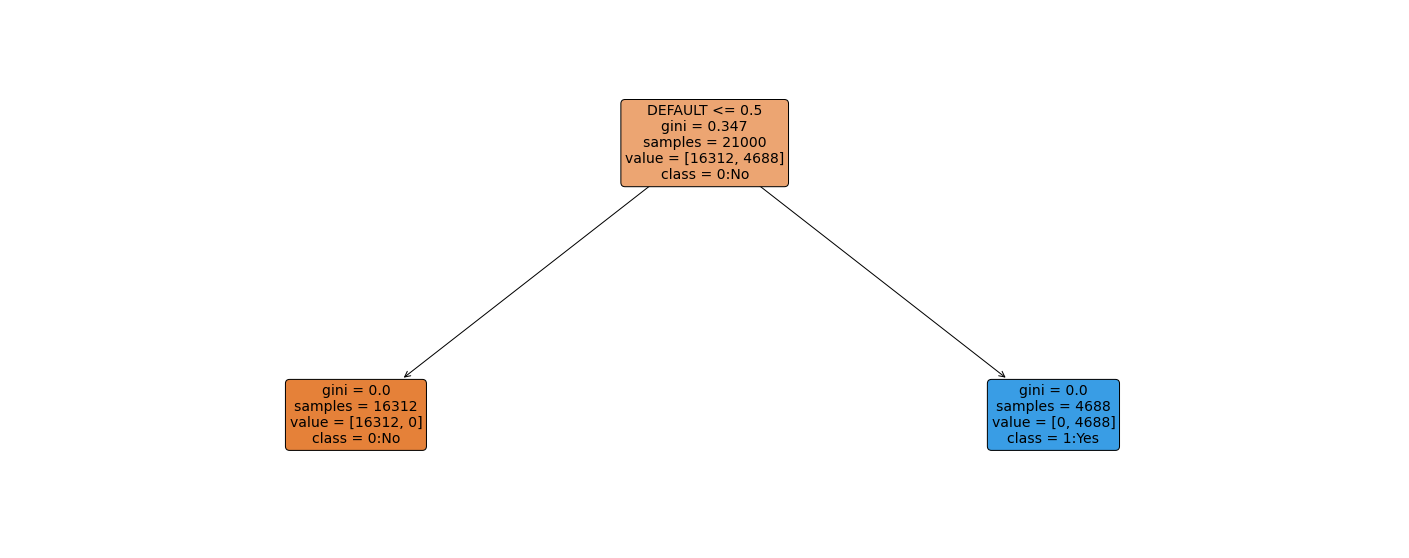

In [37]:
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

plt.figure(figsize=(25,10))
a = plot_tree(model_dc1,
             feature_names=X1.columns,
             class_names=values,
             filled=True,
             rounded=True,
             fontsize=14)

### USE EDUCATION

In [38]:
#features
X2 = rawData[['LIMIT_BAL','SEX','MARRIAGE','AGE','pay_sep','pay_avg','pay_jul','pay_jun','pay_may','pay_apr','bill_sep','bill_avg','bill_jul','bill_jun','bill_may','bill_apr','pmt_sep','pmt_avg','pmt_jul','pmt_jun','pmt_may','pay_apr','DEFAULT']]
print('Summary of feature sample')
X2.head()

Summary of feature sample


,LIMIT_BAL,SEX,MARRIAGE,AGE,pay_sep,pay_avg,pay_jul,pay_jun,pay_may,pay_apr,...,bill_jun,bill_may,bill_apr,pmt_sep,pmt_avg,pmt_jul,pmt_jun,pmt_may,pay_apr,DEFAULT
0,20000,0.0,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,-2,1
1,120000,0.0,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2,1
2,90000,0.0,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,0,0
3,50000,0.0,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,0,0
4,50000,1.0,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,0,0


In [39]:
#dependent variable
y2 = rawData['EDUCATION']
print(y2)

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
29995    1.0
29996    1.0
29997    3.0
29998    1.0
29999    3.0
Name: EDUCATION, Length: 30000, dtype: float64


In [40]:
#regression
results2 = []
names2 = []
for name2, model2 in algosClass:
    result2 = cross_val_score(model2, X2,y2, cv=3, scoring='r2')
    names2.append(name2)
    results2.append(result2)

In [41]:
for i in range(len(names2)):
    print(names2[i],results2[i].mean())

Random Forest Regressor 0.06399993578306214
Linear Regression 0.06392703968955771
Support Vector Regression -0.2485194926375398


In [42]:
#Train/Test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .3, random_state = 123)

In [43]:
#modeling
algo_rf2 = RandomForestRegressor()
model_rf2 = algo_rf2.fit(X2_train,y2_train)

#Make Predictions
pred_rf2 = model_rf2.predict(X2_test)
pred_rf2

array([1.62, 2.02, 1.47, ..., 1.96, 1.95, 2.71])

In [44]:
predRsq_rf2 = r2_score(y2_test,pred_rf2)
print('R Squared: %.3f' % predRsq_rf2)

rmse_rf2 = sqrt(mean_squared_error(y2_test, pred_rf2))
print('RMSE: %.3f' % rmse_rf2)

R Squared: 0.063
RMSE: 1.326


In [45]:
#Modeling (Classification)
algo_dc2 = DecisionTreeClassifier()
model_dc2 = algo_dc2.fit(X2_train,y2_train)

#Predictions 
pred_dc2 = model_dc2.predict(X2_test)
pred_dc2 #compare preds to y_test

array([1., 1., 3., ..., 3., 0., 3.])

In [46]:
accuracy_score(pred_dc2, y2_test)


0.4414444444444444

### USE MARRIAGE

In [47]:
#features
X3 = rawData[['LIMIT_BAL','SEX','MARRIAGE','AGE','pay_sep','pay_avg','pay_jul','pay_jun','pay_may','pay_apr','bill_sep','bill_avg','bill_jul','bill_jun','bill_may','bill_apr','pmt_sep','pmt_avg','pmt_jul','pmt_jun','pmt_may','pay_apr','DEFAULT']]
print('Summary of feature sample')
X3.head()

Summary of feature sample


,LIMIT_BAL,SEX,MARRIAGE,AGE,pay_sep,pay_avg,pay_jul,pay_jun,pay_may,pay_apr,...,bill_jun,bill_may,bill_apr,pmt_sep,pmt_avg,pmt_jul,pmt_jun,pmt_may,pay_apr,DEFAULT
0,20000,0.0,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,-2,1
1,120000,0.0,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2,1
2,90000,0.0,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,0,0
3,50000,0.0,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,0,0
4,50000,1.0,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,0,0


In [48]:
#dependent variable
y3 = rawData['MARRIAGE']
print(y3)

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64


In [49]:
#regression
results3 = []
names3 = []
for name3, model3 in algosClass:
    result3 = cross_val_score(model3, X3, y3, cv=3, scoring='r2')
    names3.append(name3)
    results3.append(result3)

In [50]:
for i in range(len(names3)):
    print(names3[i],results3[i].mean())

Random Forest Regressor 1.0
Linear Regression 1.0
Support Vector Regression -0.2508160640467126


In [51]:
#Train/Test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = .3, random_state = 123)

In [52]:
#modeling
algo_rf3 = RandomForestRegressor()
model_rf3 = algo_rf3.fit(X3_train,y3_train)

#Make Predictions
pred_rf3 = model_rf3.predict(X3_test)
pred_rf3

array([2., 1., 2., ..., 2., 1., 1.])

In [53]:
predRsq_rf3 = r2_score(y3_test,pred_rf3)
print('R Squared: %.3f' % predRsq_rf3)

rmse_rf3 = sqrt(mean_squared_error(y3_test, pred_rf3))
print('RMSE: %.3f' % rmse_rf3)

R Squared: 1.000
RMSE: 0.000


In [54]:
#Modeling (Classification)
algo_dc3 = DecisionTreeClassifier()
model_dc3 = algo_dc3.fit(X3_train,y3_train)

#Predictions 
pred_dc3 = model_dc3.predict(X3_test)
pred_dc3 #compare preds to y_test

array([2, 1, 2, ..., 2, 1, 1])

In [55]:
accuracy_score(pred_dc3, y3_test)

1.0

### USE AGE

In [56]:
#features
X4 = rawData[['LIMIT_BAL','SEX','MARRIAGE','AGE','pay_sep','pay_avg','pay_jul','pay_jun','pay_may','pay_apr','bill_sep','bill_avg','bill_jul','bill_jun','bill_may','bill_apr','pmt_sep','pmt_avg','pmt_jul','pmt_jun','pmt_may','pay_apr','DEFAULT']]
print('Summary of feature sample')
X4.head()

Summary of feature sample


,LIMIT_BAL,SEX,MARRIAGE,AGE,pay_sep,pay_avg,pay_jul,pay_jun,pay_may,pay_apr,...,bill_jun,bill_may,bill_apr,pmt_sep,pmt_avg,pmt_jul,pmt_jun,pmt_may,pay_apr,DEFAULT
0,20000,0.0,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,-2,1
1,120000,0.0,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2,1
2,90000,0.0,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,0,0
3,50000,0.0,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,0,0
4,50000,1.0,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,0,0


In [57]:
#dependent variable
y4 = rawData['AGE']
print(y4)

0        24
1        26
2        34
3        37
4        57
         ..
29995    39
29996    43
29997    37
29998    41
29999    46
Name: AGE, Length: 30000, dtype: int64


In [58]:
#regression
results4 = []
names4 = []
for name4, model4 in algosClass:
    result4 = cross_val_score(model4, X4,y4, cv=3, scoring='r2')
    names4.append(name4)
    results4.append(result4)


In [59]:
for i in range(len(names4)):
    print(names4[i],results4[i].mean())

Random Forest Regressor 0.9999882453119926
Linear Regression 1.0
Support Vector Regression -0.0293227733019521


In [60]:
#Train/Test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = .3, random_state = 123)

In [61]:
#modeling
algo_rf4 = RandomForestRegressor()
model_rf4 = algo_rf4.fit(X4_train,y4_train)

#Make Predictions
pred_rf4 = model_rf4.predict(X4_test)
pred_rf4

array([26., 59., 30., ..., 22., 38., 24.])

In [62]:
predRsq_rf4 = r2_score(y4_test,pred_rf4)
print('R Squared: %.3f' % predRsq_rf4)

rmse_rf4 = sqrt(mean_squared_error(y4_test, pred_rf4))
print('RMSE: %.3f' % rmse_rf4)

R Squared: 1.000
RMSE: 0.013


In [63]:
#Modeling (Classification)
algo_dc4 = DecisionTreeClassifier()
model_dc4 = algo_dc4.fit(X4_train,y4_train)

#Predictions 
pred_dc4 = model_dc4.predict(X4_test)
pred_dc4 #compare preds to y_test

array([26, 59, 30, ..., 22, 38, 24])

In [64]:
accuracy_score(pred_dc4, y4_test)

0.9997777777777778

### VISUALIZATIONS

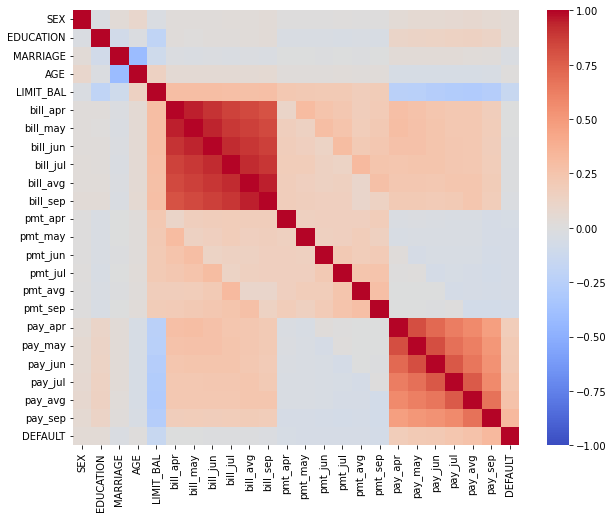

In [65]:
fig, ax = plt.subplots(figsize=(10,8)) 
cm_df = sns.heatmap(rawData.corr(), annot=False, vmin=-1, vmax=1, cmap = "coolwarm", ax=ax)

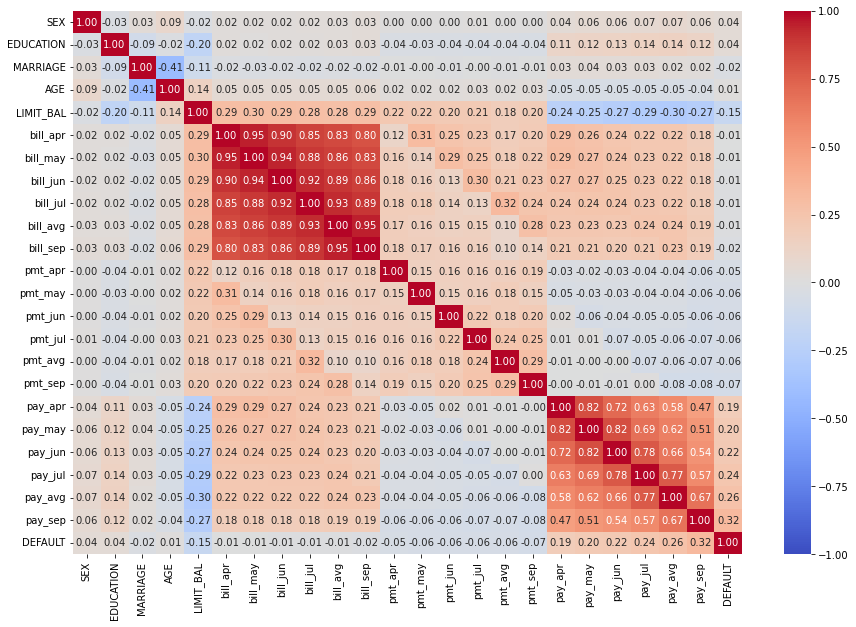

In [66]:
fig, ax = plt.subplots(figsize=(15,10)) 
cm_df = sns.heatmap(rawData.corr(), annot=True, fmt = ".2f", vmin=-1, vmax=1, cmap = "coolwarm", ax=ax)

/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments

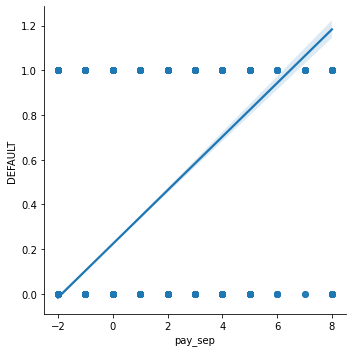

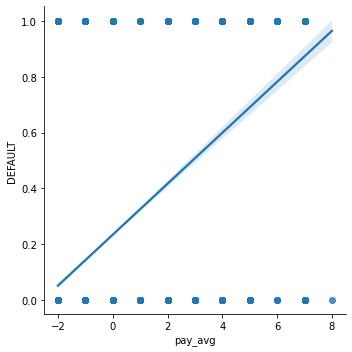

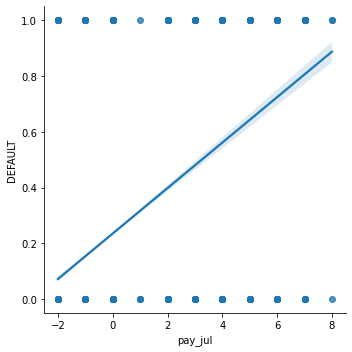

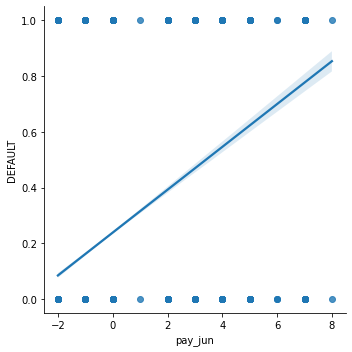

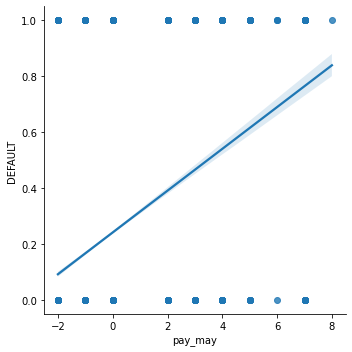

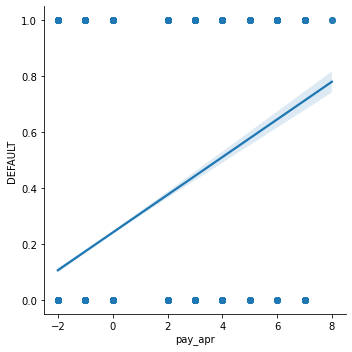

In [67]:
sns.lmplot('pay_sep', 'DEFAULT', data=rawData)
sns.lmplot('pay_avg', 'DEFAULT', data=rawData)
sns.lmplot('pay_jul', 'DEFAULT', data=rawData)
sns.lmplot('pay_jun', 'DEFAULT', data=rawData)
sns.lmplot('pay_may', 'DEFAULT', data=rawData)
sns.lmplot('pay_apr', 'DEFAULT', data=rawData)
print()

Limit Balance Histogram


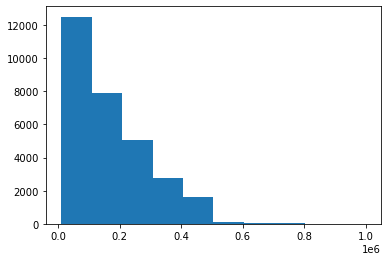

CREDIT_LIMIT
>100K    12498
>200K     7880
>300K     5059
>400K     2759
>500K     1598
>600K      127
>700K       56
>800K       22
>900K        1
Name: CREDIT_LIMIT, dtype: int64
CREDIT_LIMIT
>100K    41.660000
>200K    26.266667
>300K    16.863333
>400K     9.196667
>500K     5.326667
>600K     0.423333
>700K     0.186667
>800K     0.073333
>900K     0.003333
Name: CREDIT_LIMIT, dtype: float64


In [68]:
#histogram using the .hist method of matplotlib
print("Limit Balance Histogram")
plt.hist(rawData['LIMIT_BAL'], bins=10)
plt.show()

limit = pd.cut(rawData.LIMIT_BAL,bins=[1,100000,200000,300000,400000,500000,600000,700000,800000,1000000],labels=['>100K','>200K','>300K','>400K','>500K','>600K','>700K','>800K','>900K'])
rawData.insert(1,'CREDIT_LIMIT',limit)

#Number of transactions per region grouped by transaction type
rawData.pivot_table('LIMIT_BAL', 'CREDIT_LIMIT', aggfunc=len, margins=True)

#Counting the frequency of each labels
credit_count = rawData.groupby('CREDIT_LIMIT')['CREDIT_LIMIT'].count()

#Calculating the sum of the frequency
credit_sum = credit_count.sum()

#Normalizing the frequency
credit_prct = credit_count.apply(lambda x: 100*x / credit_sum)

print(credit_count)
print(credit_prct)

Gender Histogram


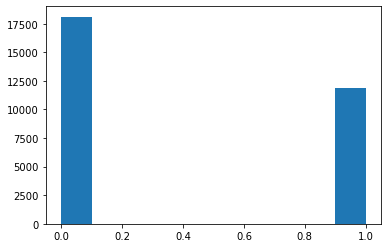

Where 1 = male and 0 = female
SEX
0.0    18112
1.0    11888
Name: SEX, dtype: int64
SEX
0.0    60.373333
1.0    39.626667
Name: SEX, dtype: float64


In [69]:
#histogram using the .hist method of matplotlib
print("Gender Histogram")
plt.hist(rawData['SEX'])
plt.show()

print('Where 1 = male and 0 = female')
#Counting the frequency of each labels
sex_count = rawData.groupby('SEX')['SEX'].count()

#Calculating the sum of the frequency
sex_sum = sex_count.sum()

#Normalizing the frequency
sex_prct = sex_count.apply(lambda x: 100*x / sex_sum)

print(sex_count)
print(sex_prct)

Level of Education Histogram


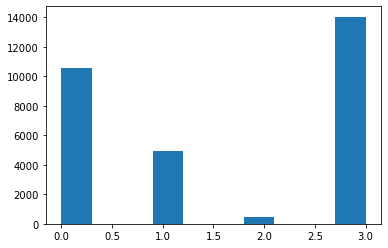

Where 0 = graduate school; 3 = university; 1 = high school; 2 = others
EDUCATION
0.0    10585
1.0     4917
2.0      468
3.0    14030
Name: EDUCATION, dtype: int64
EDUCATION
0.0    35.283333
1.0    16.390000
2.0     1.560000
3.0    46.766667
Name: EDUCATION, dtype: float64


In [70]:
#histogram using the .hist method of matplotlib
print("Level of Education Histogram")
plt.hist(rawData['EDUCATION'])
plt.show()

print('Where 0 = graduate school; 3 = university; 1 = high school; 2 = others')
#Counting the frequency of each labels
edu_count = rawData.groupby('EDUCATION')['EDUCATION'].count()

#Calculating the sum of the frequency
edu_sum = edu_count.sum()

#Normalizing the frequency
edu_prct = edu_count.apply(lambda x: 100*x / edu_sum)

print(edu_count)
print(edu_prct)

Marriage Status Histogram


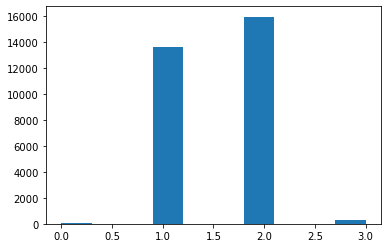

Where 0 = others; 1 = married; 2 = single; 3 = divorce
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64
MARRIAGE
0     0.180000
1    45.530000
2    53.213333
3     1.076667
Name: MARRIAGE, dtype: float64


In [71]:
#histogram using the .hist method of matplotlib
print("Marriage Status Histogram")
plt.hist(rawData['MARRIAGE'])
plt.show()

print('Where 0 = others; 1 = married; 2 = single; 3 = divorce')
#Counting the frequency of each labels
marr_count = rawData.groupby('MARRIAGE')['MARRIAGE'].count()

#Calculating the sum of the frequency
marr_sum = marr_count.sum()

#Normalizing the frequency
marr_prct = marr_count.apply(lambda x: 100*x / marr_sum)

print(marr_count)
print(marr_prct)

Age Histogram


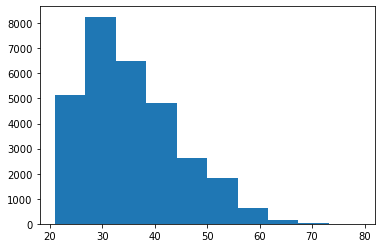

AGE_GROUP
20     9618
30    11238
40     6464
50     2341
60      314
70       25
Name: AGE_GROUP, dtype: int64
AGE_GROUP
20    32.060000
30    37.460000
40    21.546667
50     7.803333
60     1.046667
70     0.083333
Name: AGE_GROUP, dtype: float64


In [72]:
#histogram using the .hist method of matplotlib
print("Age Histogram")
plt.hist(rawData['AGE'], bins=10)
plt.show()

age = pd.cut(rawData.AGE,bins=[19,29,39,49,59,69,79],labels=['20','30','40','50','60','70'])
rawData.insert(1,'AGE_GROUP',age)

#Number of transactions per region grouped by transaction type
rawData.pivot_table('AGE', 'AGE_GROUP', aggfunc=len, margins=True)

#Counting the frequency of each labels
age_count = rawData.groupby('AGE_GROUP')['AGE_GROUP'].count()

#Calculating the sum of the frequency
age_sum = age_count.sum()

#Normalizing the frequency
age_prct = age_count.apply(lambda x: 100*x / age_sum)

print(age_count)
print(age_prct)

Default Payment Status Status Histogram


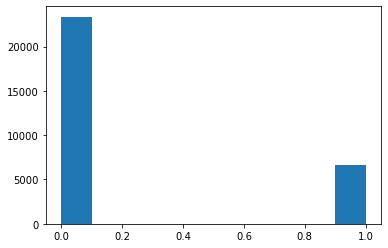

Where 0 = then not default, 1 = then default
DEFAULT
0    23364
1     6636
Name: DEFAULT, dtype: int64
DEFAULT
0    77.88
1    22.12
Name: DEFAULT, dtype: float64


In [73]:
#histogram using the .hist method of matplotlib
print("Default Payment Status Status Histogram")
plt.hist(rawData['DEFAULT'])
plt.show()

print('Where 0 = then not default, 1 = then default')
#Counting the frequency of each labels
ds_count = rawData.groupby('DEFAULT')['DEFAULT'].count()

#Calculating the sum of the frequency
ds_sum = ds_count.sum()

#Normalizing the frequency
ds_prct = ds_count.apply(lambda x: 100*x / ds_sum)

print(ds_count)
print(ds_prct)

Total Defaulted vs Not Defaulted Customers


/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


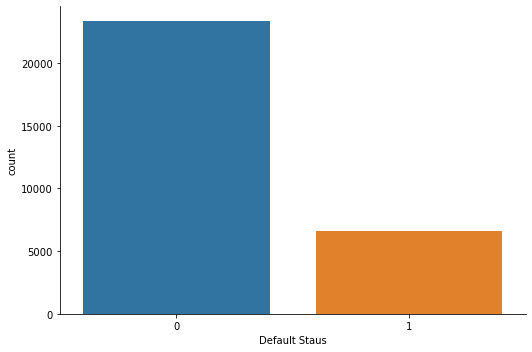

In [74]:
fg = sns.catplot('DEFAULT', data=rawData, kind='count', aspect=1.5)
fg.set_xlabels('Default Staus')
print('Total Defaulted vs Not Defaulted Customers')

In [75]:
c_total = rawData.groupby('DEFAULT')['LIMIT_BAL'].count().reset_index()
c_total.sort_values('LIMIT_BAL', ascending=False)

,DEFAULT,LIMIT_BAL
0,0,23364
1,1,6636


In [76]:
amt_total = rawData.groupby('DEFAULT')['LIMIT_BAL'].sum().reset_index()
amt_total.sort_values('LIMIT_BAL', ascending=False)

,DEFAULT,LIMIT_BAL
0,0,4161122000
1,1,863407680


Defaulted vs Not Defaulted Customers Grouped by Credit Line
Where 0 = then not default, 1 = then default


/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


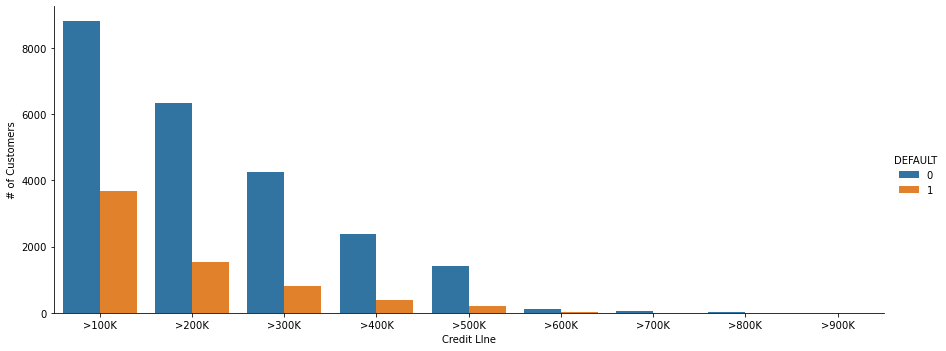

In [77]:
# Instead of a group by, use seaborn to plot the count
lb = sns.catplot('CREDIT_LIMIT', data=rawData, hue='DEFAULT', kind='count', aspect=2.5)
lb.set_xlabels('Credit LIne')
lb.set_ylabels('# of Customers')
print('Defaulted vs Not Defaulted Customers Grouped by Credit Line')
print('Where 0 = then not default, 1 = then default')

In [78]:
rawData.groupby(['CREDIT_LIMIT', 'DEFAULT']).count()

SEX  AGE_GROUP  EDUCATION  MARRIAGE   AGE  LIMIT_BAL  \
CREDIT_LIMIT DEFAULT                                                          
>100K        0        8814       8814       8814      8814  8814       8814   
             1        3684       3684       3684      3684  3684       3684   
>200K        0        6345       6345       6345      6345  6345       6345   
             1        1535       1535       1535      1535  1535       1535   
>300K        0        4247       4247       4247      4247  4247       4247   
             1         812        812        812       812   812        812   
>400K        0        2371       2371       2371      2371  2371       2371   
             1         388        388        388       388   388        388   
>500K        0        1404       1404       1404      1404  1404       1404   
             1         194        194        194       194   194        194   
>600K        0         110        110        110       110   110        110   
             1          17         17         17        17    17         17   
>700K        0          53         53         53        53    53         53   
             1           3          3          3         3     3          3   
>800K        0          19         19         19        19    19         19   
             1           3          3          3         3     3          3   
>900K        0           1          1          1         1     1          1   
             1           0          0          0         0     0          0   

                      bill_apr  bill_may  bill_jun  bill_jul  ...  pmt_jun  \
CREDIT_LIMIT DEFAULT                                          ...            
>100K        0            8814      8814      8814      8814  ...     8814   
             1            3684      3684      3684      3684  ...     3684   
>200K        0            6345      6345      6345      6345  ...     6345   
             1            1535      1535      1535      1535  ...     1535   
>300K        0            4247      4247      4247      4247  ...     4247   
             1             812       812       812       812  ...      812   
>400K        0            2371      2371      2371      2371  ...     2371   
             1             388       388       388       388  ...      388   
>500K        0            1404      1404      1404      1404  ...     1404   
             1             194       194       194       194  ...      194   
>600K        0             110       110       110       110  ...      110   
             1              17        17        17        17  ...       17   
>700K        0              53        53        53        53  ...       53   
             1               3         3         3         3  ...        3   
>800K        0              19        19        19        19  ...       19   
             1               3         3         3         3  ...        3   
>900K        0               1         1         1         1  ...        1   
             1               0         0         0         0  ...        0   

                      pmt_jul  pmt_avg  pmt_sep  pay_apr  pay_may  pay_jun  \
CREDIT_LIMIT DEFAULT                                                         
>100K        0           8814     8814     8814     8814     8814     8814   
             1           3684     3684     3684     3684     3684     3684   
>200K        0           6345     6345     6345     6345     6345     6345   
             1           1535     1535     1535     1535     1535     1535   
>300K        0           4247     4247     4247     4247     4247     4247   
             1            812      812      812      812      812      812   
>400K        0           2371     2371     2371     2371     2371     2371   
             1            388      388      388      388      388      388   
>500K        0           1404     1404     1404     1404     1404     1404   
             1         

In [79]:
rawData.groupby(['CREDIT_LIMIT', 'DEFAULT']).sum()

SEX  EDUCATION  MARRIAGE     AGE   LIMIT_BAL  \
CREDIT_LIMIT DEFAULT                                                    
>100K        0        3709.0    16422.0     14298  301648   478892000   
             1        1648.0     7109.0      5789  127430   180760000   
>200K        0        2186.0     9681.0      9880  222932  1009190000   
             1         650.0     2381.0      2321   55532   238430000   
>300K        0        1457.0     5878.0      6404  154340  1064270000   
             1         310.0     1121.0      1165   30576   202660000   
>400K        0         956.0     2945.0      3519   87341   837970000   
             1         159.0      454.0       568   14770   137207680   
>500K        0         627.0     1545.0      2033   54053   661050000   
             1          97.0      193.0       268    7862    90830000   
>600K        0          46.0      100.0       166    4302    60440000   
             1           8.0       26.0        21     687     9420000   
>700K        0          24.0       50.0        89    2020    34200000   
             1           0.0        3.0         5     104     1930000   
>800K        0          10.0       29.0        26     806    14110000   
             1           1.0        6.0         3     115     2170000   
>900K        0           0.0        0.0         1      47     1000000   
             1           0.0        0.0         0       0           0   

                       bill_apr   bill_may   bill_jun   bill_jul   bill_avg  \
CREDIT_LIMIT DEFAULT                                                          
>100K        0        187699525  196215753  216477164  246518392  262973255   
             1         85496618   87464765   95261592  103389141  107552681   
>200K        0        261310723  270341589  288637960  313388739  329950208   
             1         75658749   76845396   79658249   84965546   89604708   
>300K        0        209899108  216240029  230047521  249829511  262205729   
             1         44646413   46298778   50105337   53415020   55589554   
>400K        0        125616328  132944112  143037196  152251260  158240145   
             1         24889575   27404951   28397337   30757842   32499703   
>500K        0        104625038  107882409  116123091  122313788  121519948   
             1         18257496   19108459   19554432   20791654   21801374   
>600K        0         12502427   12847910   13940565   15085481   14984480   
             1          4224049    4617334    5190690    5684932    5853223   
>700K        0          6908519    7023532    7636106    8000266    8383666   
             1           676971     503962     623894     660784     654715   
>800K        0          2660234    2530820    2140076    2647097    2356805   
             1           119375     145059     165673     160171     218130   
>900K        0           961664     927171     891586     535020     983931   
             1                0          0          0          0          0   

                      ...   pmt_jun   pmt_jul   pmt_avg   pmt_sep  pay_apr  \
CREDIT_LIMIT DEFAULT  ...                                                    
>100K        0        ...  20682990  21704848  27921328  27262567    -1230   
             1        ...   6418167   6970813   7284015   8066128     1636   
>200K        0        ...  30556823  33272195  35717765  37489615    -3011   
             1        ...   6265796   5672748   5543372   6625676      -99   
>300K        0        ...  28938925  29047160  32046806  32132156    -2606   
             1        ...   3545819   4720548   4128241   3765806     -360   
>400K        0        ...  20710275  24841533  28503415  28499555    -1629   
             1        ...   2022186   2191698   2626096   2174389     -314   
>500K        0        ...  19784202  21154222  26591618  18584884     -904   
             1        ...   2463369   2315801   2520096   1666832     -121   
>600K        0        ...   1286924   2277204  

Default vs No Default Payment Grouped by Sex


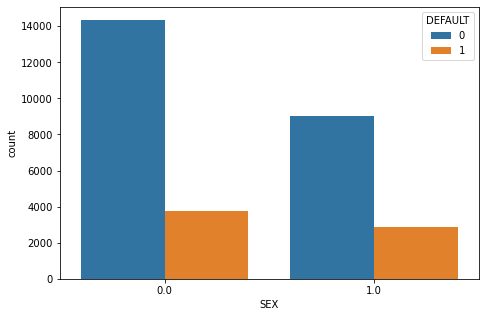

In [80]:
print('Default vs No Default Payment Grouped by Sex')
plt.figure(figsize=(7.5,5))
sns.countplot(x=rawData['SEX'],hue=rawData['DEFAULT'])
plt.show()

In [81]:
print('Where 1 = male and 0 = female')

rawData.groupby(['SEX', 'DEFAULT'])['DEFAULT'].count()

Where 1 = male and 0 = female


SEX  DEFAULT
0.0  0          14349
     1           3763
1.0  0           9015
     1           2873
Name: DEFAULT, dtype: int64

Default vs No Default Payment Grouped by Level of Education


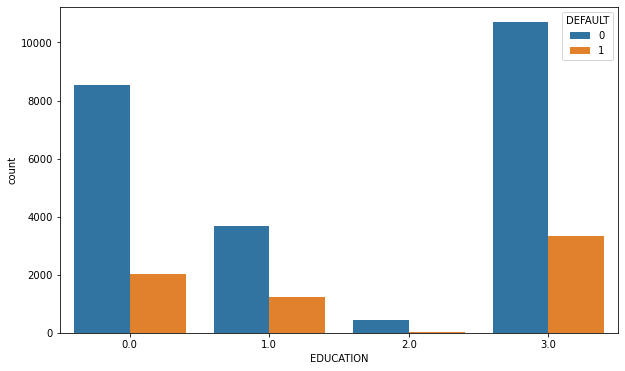

In [82]:
print('Default vs No Default Payment Grouped by Level of Education')
plt.figure(figsize=(10,6))
sns.countplot(x=rawData['EDUCATION'],hue=rawData['DEFAULT'])
plt.show()

In [83]:
print('Where 0 = graduate school; 3 = university; 1 = high school; 2 = others')

rawData.groupby(['EDUCATION', 'DEFAULT'])['EDUCATION'].count()

Where 0 = graduate school; 3 = university; 1 = high school; 2 = others


EDUCATION  DEFAULT
0.0        0           8549
           1           2036
1.0        0           3680
           1           1237
2.0        0            435
           1             33
3.0        0          10700
           1           3330
Name: EDUCATION, dtype: int64

Default vs No Default Payment Grouped by Marital Status


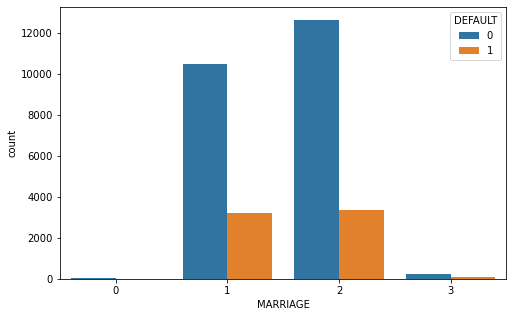

In [84]:
print('Default vs No Default Payment Grouped by Marital Status')
plt.figure(figsize=(8,5))
sns.countplot(x=rawData['MARRIAGE'],hue=rawData['DEFAULT'])
plt.show()

In [85]:
print('Where 0 = others; 1 = married; 2 = single; 3 = divorce')

rawData.groupby(['MARRIAGE', 'DEFAULT'])['MARRIAGE'].count()

Where 0 = others; 1 = married; 2 = single; 3 = divorce


MARRIAGE  DEFAULT
0         0             49
          1              5
1         0          10453
          1           3206
2         0          12623
          1           3341
3         0            239
          1             84
Name: MARRIAGE, dtype: int64

Default vs No Default Payment Grouped by Age Group


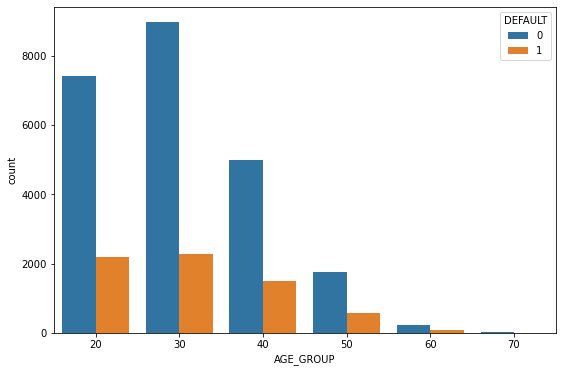

In [86]:
print('Default vs No Default Payment Grouped by Age Group')
plt.figure(figsize=(9,6))
sns.countplot(x=rawData['AGE_GROUP'],hue=rawData['DEFAULT'])
plt.show()

In [87]:
rawData.groupby(['AGE_GROUP', 'DEFAULT'])['MARRIAGE'].count()

AGE_GROUP  DEFAULT
20         0          7421
           1          2197
30         0          8962
           1          2276
40         0          4979
           1          1485
50         0          1759
           1           582
60         0           225
           1            89
70         0            18
           1             7
Name: MARRIAGE, dtype: int64

/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Default Status by Credit Line


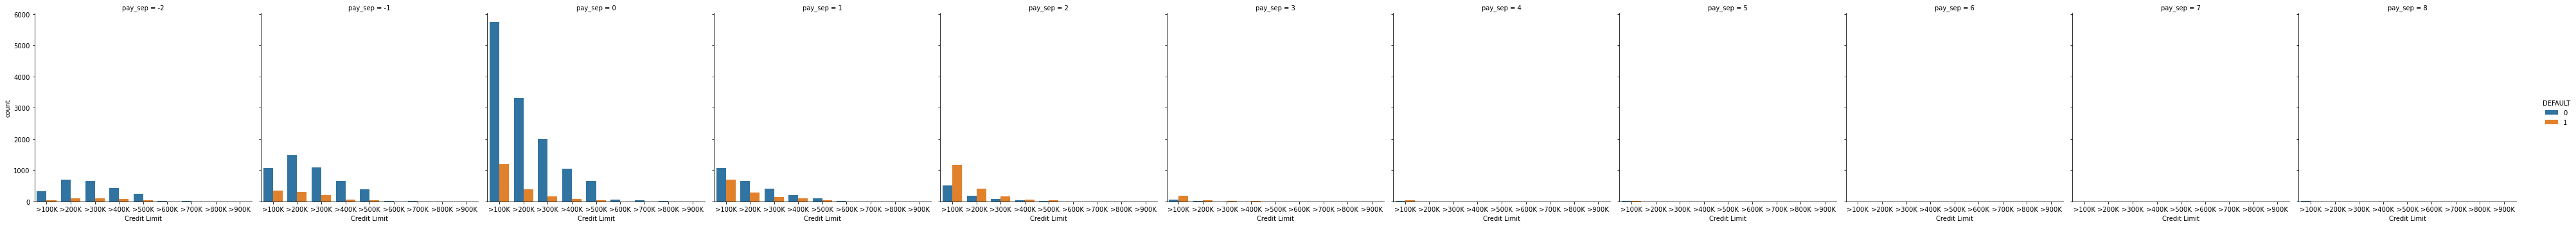

In [88]:
fg=sns.catplot('CREDIT_LIMIT', data=rawData, kind='count', hue='DEFAULT', col='pay_sep', hue_order=range(0,2))
fg.set_xlabels('Credit Limit')
print('Default Status by Credit Line')

/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


History of Past Payment


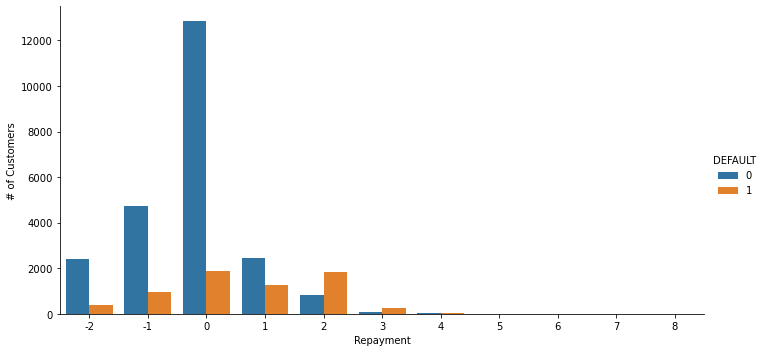

In [89]:
# Instead of a group by, use seaborn to plot the count
lb = sns.catplot('pay_sep', data=rawData, hue='DEFAULT', kind='count', aspect=2)
lb.set_xlabels('Repayment')
lb.set_ylabels('# of Customers')
print('History of Past Payment')

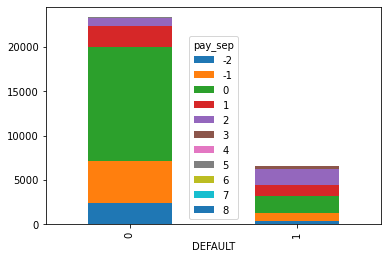

In [90]:
rawData.groupby(['DEFAULT','pay_sep']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Default Status by Level of Education


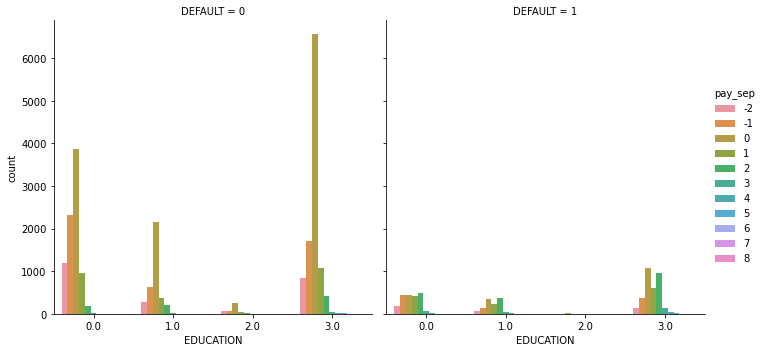

In [91]:
fg=sns.factorplot('EDUCATION', data=rawData, kind='count', hue='pay_sep', col='DEFAULT', hue_order=range(-2,9))
fg.set_xlabels('EDUCATION')
print('Default Status by Level of Education')

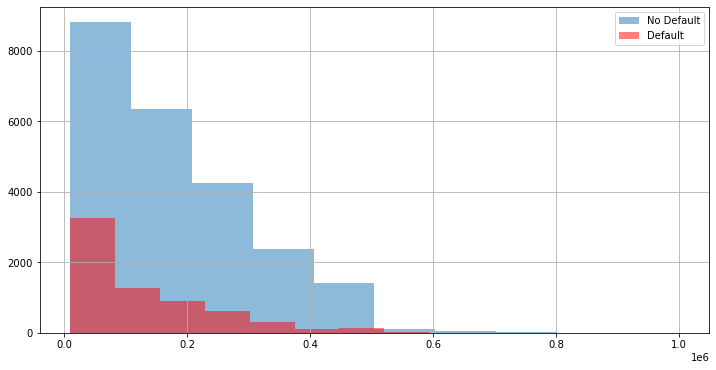

In [92]:
plt.figure(figsize=(12,6))
rawData[rawData['DEFAULT']==0]['LIMIT_BAL'].hist(bins=10,alpha=0.5,label='No Default')
rawData[rawData['DEFAULT']==1]['LIMIT_BAL'].hist(color='red',bins=10,alpha=0.5,label='Default')
plt.legend()
plt.show()

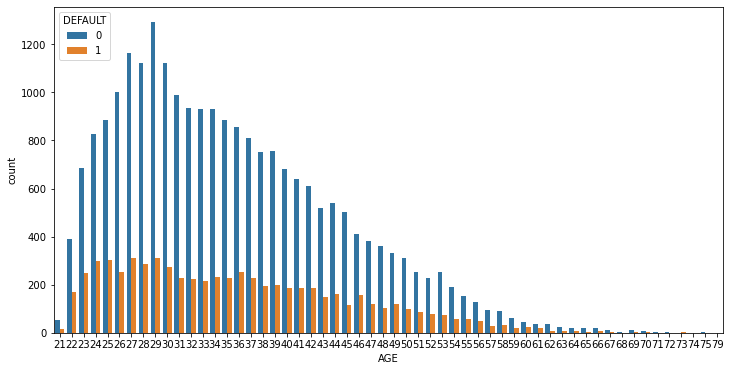

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(x=rawData['AGE'],hue=rawData['DEFAULT'])
from sklearn import tree
plt.show()

In [94]:
rawData.pivot_table('LIMIT_BAL', 'AGE_GROUP', 'DEFAULT', aggfunc=np.sum, margins=True)

DEFAULT,0,1,All
AGE_GROUP,,,
20,988380000,206260000,1194640000
30,1862870000,351030000,2213900000
40,956172000,212427680,1168599680
50,307420000,76290000,383710000
60,42340000,15870000,58210000
70,3940000,1530000,5470000
All,4161122000,863407680,5024529680


In [95]:
rawData.pivot_table('LIMIT_BAL', 'MARRIAGE', 'DEFAULT', aggfunc=np.sum, margins=True)

DEFAULT,0,1,All
MARRIAGE,,,
0,6570000,610000,7180000
1,2029562000,459120000,2488682000
2,2099460000,397527680,2496987680
3,25530000,6150000,31680000
All,4161122000,863407680,5024529680


In [96]:
rawData.pivot_table('LIMIT_BAL', 'EDUCATION', 'DEFAULT', aggfunc=np.sum, margins=True)

DEFAULT,0,1,All
EDUCATION,,,
0.0,1891250000,362890000,2254140000
1.0,500990000,121257680,622247680
2.0,80526000,4330000,84856000
3.0,1688356000,374930000,2063286000
All,4161122000,863407680,5024529680


In [97]:
rawData.pivot_table('LIMIT_BAL', 'SEX', 'DEFAULT', aggfunc=np.sum, margins=True)

DEFAULT,0,1,All
SEX,,,
0.0,2578896000,501710000,3080606000
1.0,1582226000,361697680,1943923680
All,4161122000,863407680,5024529680


Historical Payment Histogram


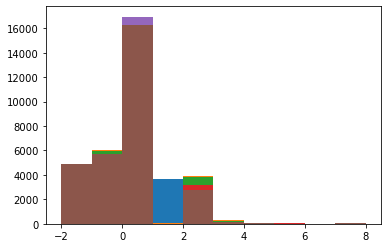

In [98]:
#histogram using the .hist method of matplotlib
print("Historical Payment Histogram")
plt.hist(rawData['pay_sep'])
plt.hist(rawData['pay_avg'])
plt.hist(rawData['pay_jul'])
plt.hist(rawData['pay_jun'])
plt.hist(rawData['pay_may'])
plt.hist(rawData['pay_apr'])
plt.show()

In [99]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1) = plt.subplots(1, sharex=False, figsize=(10,5))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(rawData.loc[rawData[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(rawData[col_name], order=sorted(rawData[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(rawData, hue = 'DEFAULT', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='DEFAULT', data=rawData, order=sorted(rawData[col_name].unique()) )
     
    plt.tight_layout()

/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


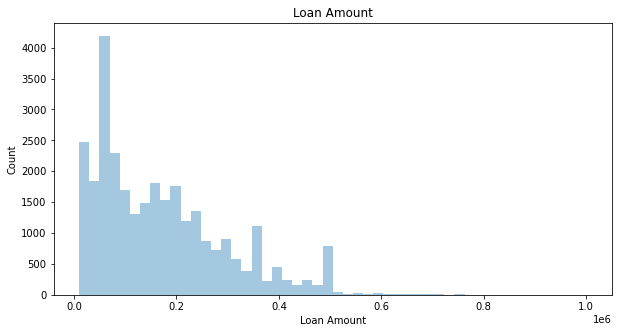

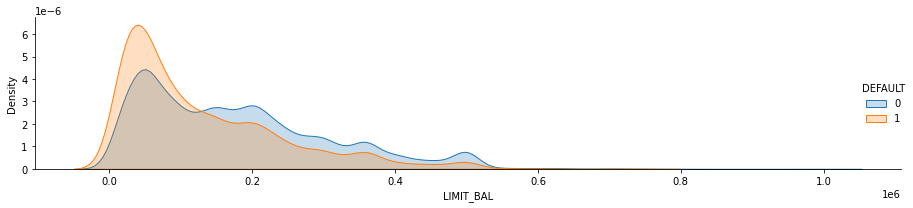

In [100]:
plot_var('LIMIT_BAL', 'Loan Amount', continuous=True)

/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note 

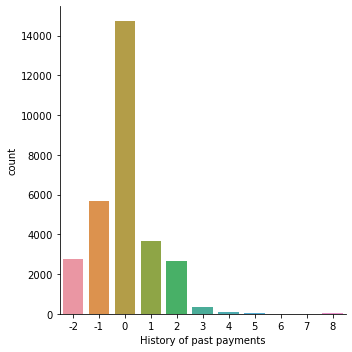

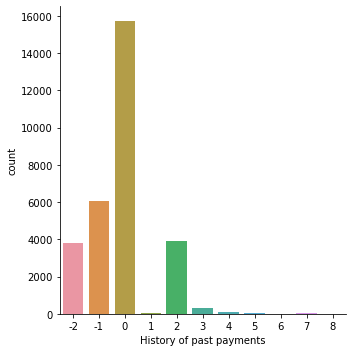

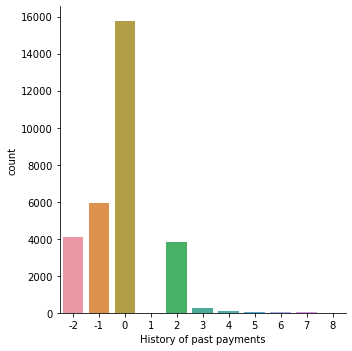

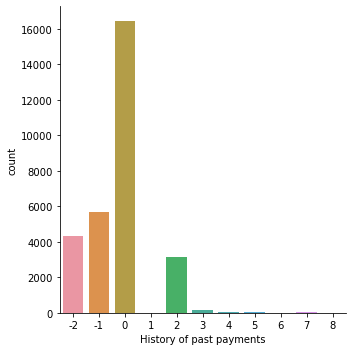

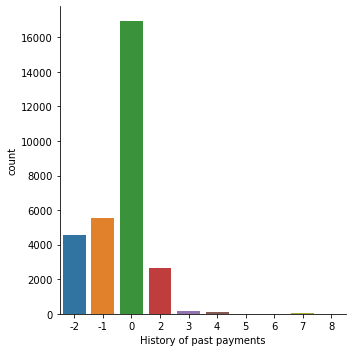

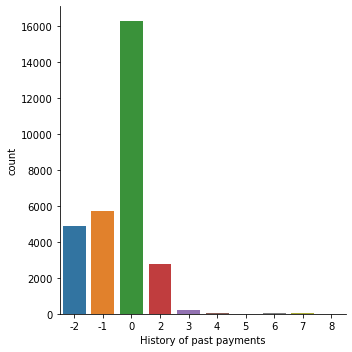

In [101]:
pay1 = sns.factorplot('pay_sep', data=rawData, kind='count').set_xlabels('History of past payments')
pay2 = sns.factorplot('pay_avg', data=rawData, kind='count').set_xlabels('History of past payments')
pay3 = sns.factorplot('pay_jul', data=rawData, kind='count').set_xlabels('History of past payments')
pay4 = sns.factorplot('pay_jun', data=rawData, kind='count').set_xlabels('History of past payments')
pay5 = sns.factorplot('pay_may', data=rawData, kind='count').set_xlabels('History of past payments')
pay6 = sns.factorplot('pay_apr', data=rawData, kind='count').set_xlabels('History of past payments')

In [104]:
pymt = rawData.loc[:,'pay_sep':'pay_apr']
sns.pairplot(pymt, kind = 'count')
plt.show()

ValueError: No variables found for grid columns.

In [107]:
billamt = rawData.loc[:,'bill_sep':'bill_apr']
sns.pairplot(billamt, kind='count')
plt.show()

ValueError: No variables found for grid columns.

/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jasminatrbakovic/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passi

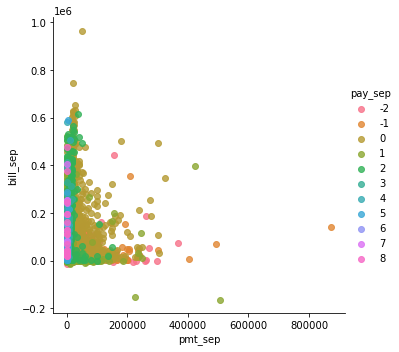

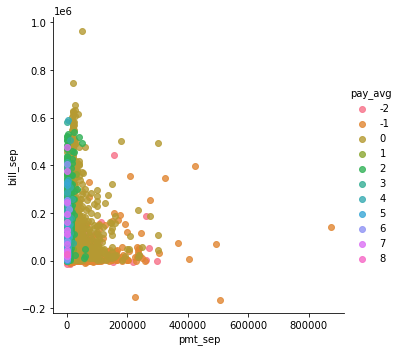

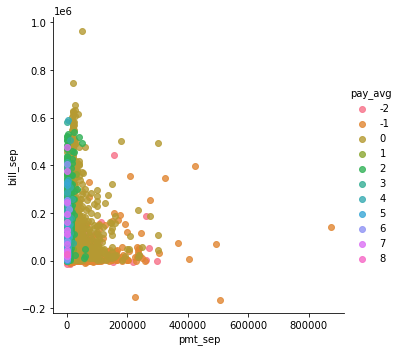

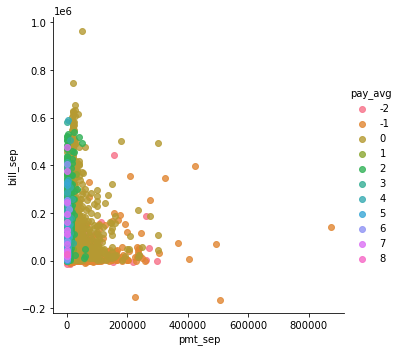

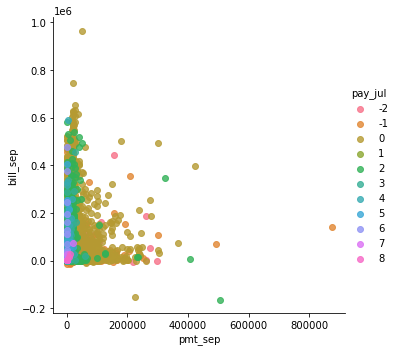

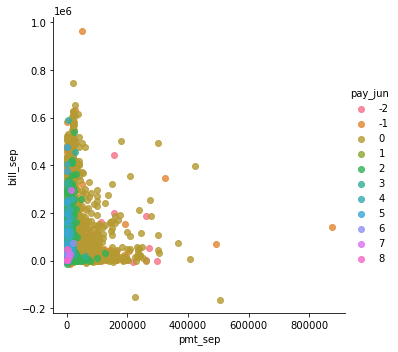

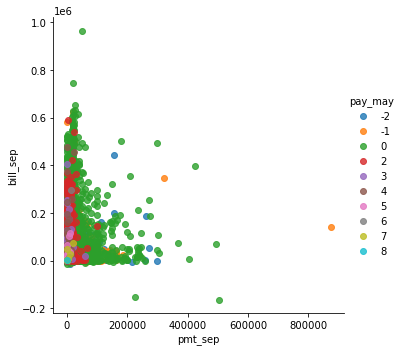

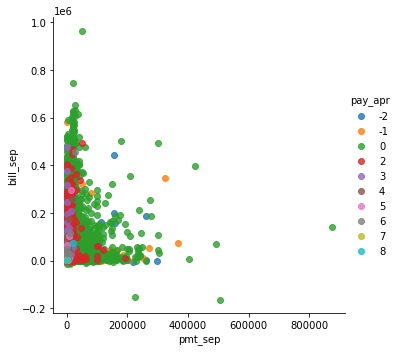

In [106]:
sns.lmplot("pmt_sep", "bill_sep", rawData, hue="pay_sep", fit_reg=False)
sns.lmplot("pmt_sep", "bill_sep", rawData, hue="pay_avg", fit_reg=False)
sns.lmplot("pmt_sep", "bill_sep", rawData, hue="pay_avg", fit_reg=False)
sns.lmplot("pmt_sep", "bill_sep", rawData, hue="pay_avg", fit_reg=False)
sns.lmplot("pmt_sep", "bill_sep", rawData, hue="pay_jul", fit_reg=False)
sns.lmplot("pmt_sep", "bill_sep", rawData, hue="pay_jun", fit_reg=False)
sns.lmplot("pmt_sep", "bill_sep", rawData, hue="pay_may", fit_reg=False)
sns.lmplot("pmt_sep", "bill_sep", rawData, hue="pay_apr", fit_reg=False)